# <center>*MASK DETECTION PROJECT*</center>

In [58]:
images=[]
labels=[]

In [2]:
import os

In [3]:
os.listdir("C:/Users/Khush Shah/INMOVIDU AI WORKSHOP/dataset/")

['without_mask', 'with_mask']

In [4]:
import cv2

In [5]:
face_cascade = cv2.CascadeClassifier('C:/Users/Khush Shah/anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml')
for i in ['without_mask', 'with_mask']:
    imageNameList=os.listdir("C:/Users/Khush Shah/INMOVIDU AI WORKSHOP/dataset/"+str(i))
    for fileName in imageNameList:
        Image=cv2.imread("C:/Users/Khush Shah/INMOVIDU AI WORKSHOP/dataset/"+str(i)+"/"+str(fileName))
        try:
            gray=cv2.cvtColor(Image,cv2.COLOR_BGR2GRAY)
            faces=face_cascade.detectMultiScale(gray, 1.1, 10)
            if len(faces)== 1:
                for (x, y, w, h) in faces:
                    face_img=gray[y:y+h,x:x+w]
                Image=cv2.resize(gray,(100,100))
                
                images.append(Image)
                if i=="without_mask":
                    labels.append(0)
                else:
                    labels.append(1)
        except:
            pass
    print("Inside folder ", i)

Inside folder  without_mask
Inside folder  with_mask


In [6]:
import numpy as np

In [7]:
images=np.array(images)

In [8]:
len(images)

838

In [9]:
labels=np.array(labels)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_features,test_features,train_target,test_target=train_test_split(images,labels,test_size=0.2)

In [12]:
train_features.shape

(670, 100, 100)

In [13]:
train_target.shape

(670,)

In [14]:
test_features.shape

(168, 100, 100)

In [15]:
def preprocessing(img):
    img=img/255
    return img

In [16]:
train_features=np.array(list(map(preprocessing,train_features)))

In [17]:
train_features=train_features.reshape(train_features.shape[0], train_features.shape[1],train_features.shape[2],1)

In [18]:
train_features.shape

(670, 100, 100, 1)

In [19]:
test_features=np.array(list(map(preprocessing,test_features)))

In [20]:
test_features=test_features.reshape(test_features.shape[0],test_features.shape[1],test_features.shape[2],1)

In [21]:
from keras.preprocessing.image import ImageDataGenerator

In [22]:
dataGenerator=ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.3,shear_range=0.2,rotation_range=20)

In [23]:
dataGenerator.fit(train_features)

In [24]:
batches=dataGenerator.flow(train_features,train_target,batch_size=20)

In [25]:
batches

In [26]:
X_batch,y_batch=next(batches)

In [27]:
import matplotlib.pyplot as plt

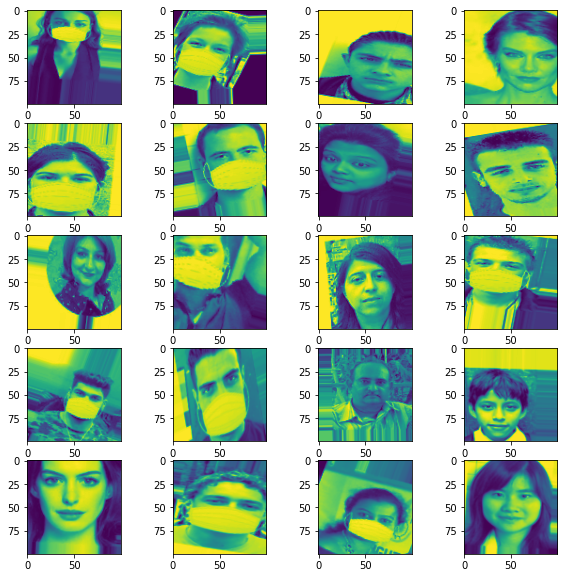

In [28]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(X_batch[i].reshape(100,100))
plt.show()

In [29]:
from keras.utils import to_categorical

In [30]:
train_target=to_categorical(train_target)

In [31]:
test_target=to_categorical(test_target)

In [32]:
test_target.shape

(168, 2)

In [33]:
from keras.models import Sequential
from keras.layers import Flatten,Conv2D,MaxPooling2D,Dense,Dropout

### 1. Specify the Architecture

In [34]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(100, 100, 1)))
model.add(Conv2D(80,(5,5),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(80,(4,4),activation="relu"))
model.add(Conv2D(50,(5,5),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(800,activation="relu"))
model.add(Dense(2,activation="softmax"))

### 2. Compile the Model

In [35]:
from keras.optimizers import Adam

In [36]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

### 3. Fit the Model

In [51]:
model.fit_generator(dataGenerator.flow(train_features,train_target,batch_size=20),epochs=30)
model.save("mask_detection_model.h5")

Epoch 1/30
34/34 [==============================] - 75s 2s/step - loss: 0.1514 - accuracy: 0.9373
Epoch 2/30
34/34 [==============================] - 75s 2s/step - loss: 0.1698 - accuracy: 0.9328
Epoch 3/30
34/34 [==============================] - 77s 2s/step - loss: 0.1582 - accuracy: 0.9493
Epoch 4/30
34/34 [==============================] - 76s 2s/step - loss: 0.1454 - accuracy: 0.9478
Epoch 5/30
34/34 [==============================] - 70s 2s/step - loss: 0.1519 - accuracy: 0.9388
Epoch 6/30
34/34 [==============================] - 70s 2s/step - loss: 0.2156 - accuracy: 0.9119
Epoch 7/30
34/34 [==============================] - 74s 2s/step - loss: 0.1625 - accuracy: 0.9463
Epoch 8/30
34/34 [==============================] - 71s 2s/step - loss: 0.1412 - accuracy: 0.9493
Epoch 9/30
34/34 [==============================] - 67s 2s/step - loss: 0.1346 - accuracy: 0.9552
Epoch 10/30
34/34 [==============================] - 67s 2s/step - loss: 0.0865 - accuracy: 0.9716
Epoch 11/30
34/34 [

In [52]:
def getClassName(classNo):
    if   classNo == 0: return 'without mask'
    elif classNo == 1: return 'with mask'

In [53]:
face_img.shape

(285, 285)

In [54]:
video=cv2.VideoCapture(0)

In [59]:
face_cascade = cv2.CascadeClassifier('C:/Users/Khush Shah/anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml')
video = cv2.VideoCapture(0)
while True:
    confirm,imgOriginal=video.read()
    gray=cv2.cvtColor(imgOriginal,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)
    if len(faces) == 1:
        for (x, y, w, h) in faces:
            face_img=gray[y:y+h,x:x+w]
            resized_img=cv2.resize(face_img,(100,100))
            normalized=resized_img/225.0
            reshaped=np.reshape(normalized,(1,100,100,1))
        predictions=model.predict(reshaped)
        classIndex=model.predict_classes(reshaped)
        probability=np.amax(predictions)
        if probability>0.5:
            cv2.rectangle(imgOriginal,(x,y),(x+w,y+h),(0,0,225),2)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(imgOriginal,getClassName(classIndex),(x,y-10),font,0.75,(100,100,169),2,cv2.LINE_AA)
    cv2.imshow("Result",imgOriginal)
    if cv2.waitKey(1)==113:
        cv2.destroyAllWindows()
        break